In [1]:
import numpy as np
import cv2 as cv
import os

In [2]:
path = 'E:/NMIMS_Semester III/Image Proceesing - ANN, CNN/datasets/Natural Images/natural_images/'

classes = {'airplane':0, 'car':1, 'cat':2, 'dog':3, 'flower':4, 'fruit':5, 'motorbike':6, 'person':7}

In [3]:
images = []
labels = []

def load_data(path):
    
    for folders in os.listdir(path):
        labels_act = folders
        for files in os.listdir(path + folders + '/'):
            image = cv.imread(path + folders + '/' + files)
            image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
            image = cv.resize(image, (100, 100))
            image = image.astype('float32')/255.0
            label = labels_act
            label = classes[label]
            images.append(image)
            labels.append(label)
            
    images_r = np.array(images)
    labels_r = np.array(labels)
    
    return images_r, labels_r

In [4]:
images, labels = load_data(path)

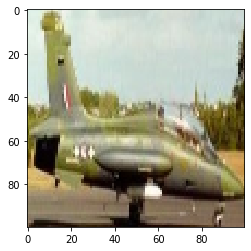

In [5]:
import matplotlib.pyplot as plt

plt.imshow(images[0], cmap='gray')

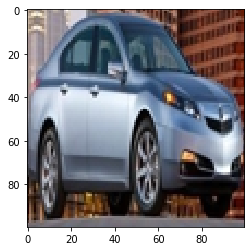

In [6]:
plt.imshow(images[780], cmap='gray')

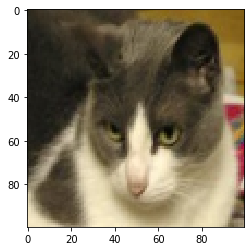

In [7]:
plt.imshow(images[2023], cmap='gray')

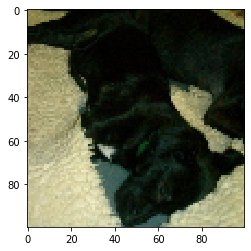

In [8]:
plt.imshow(images[3000], cmap='gray')

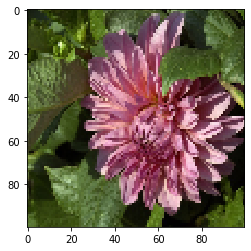

In [9]:
plt.imshow(images[4001], cmap='gray')

In [10]:
# images = images.reshape((images.shape[0], 100, 100, 1))

In [11]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.1, random_state=123)

In [12]:
Y_train_req = to_categorical(Y_train)
Y_test_req = to_categorical(Y_test)

print(X_train.shape, X_test.shape, Y_train_req.shape, Y_test_req.shape)

(6209, 100, 100, 3) (690, 100, 100, 3) (6209, 8) (690, 8)


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmentor = ImageDataGenerator(rotation_range=20, width_shift_range=0.15, height_shift_range=0.15, shear_range=0.1, zoom_range=0.1, horizontal_flip=True, validation_split=0.1)

train_batches = augmentor.flow(X_train, Y_train_req, subset='training', shuffle=True)
val_batches = augmentor.flow(X_train, Y_train_req, subset='validation')

In [14]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Input, Dropout, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.models import Sequential

In [15]:
model = Sequential()
model.add(Input((100, 100, 3)))
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(Conv2D(128, (3,3), strides=1, padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(Conv2D(256, (3,3), strides=1, padding='same', activation='relu'))
model.add(Conv2D(256, (3,3), strides=1, padding='same', activation='relu'))
model.add(Conv2D(256, (3,3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 256)       2

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
steps_per_epochs = X_train.shape[0]/32
history = model.fit_generator(train_batches, validation_data=val_batches, epochs=50, steps_per_epoch=steps_per_epochs)

Epoch 1/50
195/194 [==============================] - 64s 330ms/step - loss: 1.6728 - accuracy: 0.3411 - val_loss: 1.0900 - val_accuracy: 0.6048
Epoch 2/50
195/194 [==============================] - 64s 330ms/step - loss: 1.0012 - accuracy: 0.6378 - val_loss: 0.7705 - val_accuracy: 0.7097
Epoch 3/50
195/194 [==============================] - 66s 341ms/step - loss: 0.7145 - accuracy: 0.7420 - val_loss: 0.6560 - val_accuracy: 0.7516
Epoch 4/50
195/194 [==============================] - 68s 351ms/step - loss: 0.6211 - accuracy: 0.7763 - val_loss: 0.6359 - val_accuracy: 0.7742
Epoch 5/50
195/194 [==============================] - 69s 355ms/step - loss: 0.5671 - accuracy: 0.7856 - val_loss: 0.4695 - val_accuracy: 0.8387
Epoch 6/50
195/194 [==============================] - 70s 356ms/step - loss: 0.5170 - accuracy: 0.8086 - val_loss: 0.4570 - val_accuracy: 0.8516
Epoch 7/50
195/194 [==============================] - 70s 357ms/step - loss: 0.4634 - accuracy: 0.8258 - val_loss: 0.3713 - val_ac

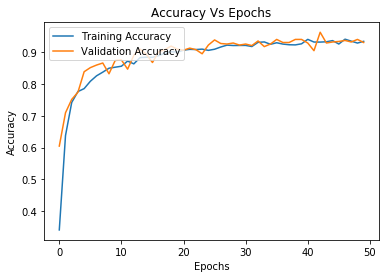

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

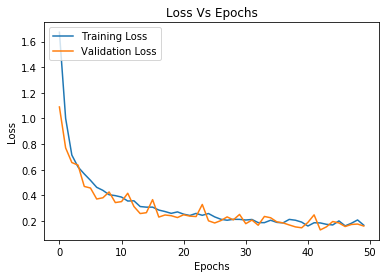

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.show()

In [21]:
model.evaluate(X_test ,Y_test_req)

690/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.14379621122194372, 0.9478261]

In [22]:
from sklearn.metrics import classification_report

In [23]:
predictions = model.predict_classes(X_test)

report = classification_report(Y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        74
           1       0.98      1.00      0.99       105
           2       0.87      0.85      0.86        88
           3       0.83      0.77      0.80        71
           4       0.97      0.91      0.94        67
           5       1.00      1.00      1.00       108
           6       0.99      1.00      0.99        82
           7       0.99      1.00      0.99        95

    accuracy                           0.95       690
   macro avg       0.94      0.94      0.94       690
weighted avg       0.95      0.95      0.95       690



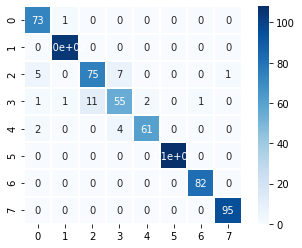

[[ 73   1   0   0   0   0   0   0]
 [  0 105   0   0   0   0   0   0]
 [  5   0  75   7   0   0   0   1]
 [  1   1  11  55   2   0   1   0]
 [  2   0   0   4  61   0   0   0]
 [  0   0   0   0   0 108   0   0]
 [  0   0   0   0   0   0  82   0]
 [  0   0   0   0   0   0   0  95]]


In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, predictions)
heatmap = sns.heatmap(cm, annot=True, cmap='Blues', square=True, linewidths=1)
plt.show()

print(cm)

In [25]:
model.save('E:/NMIMS_Semester III/Image Proceesing - ANN, CNN/Saved Models/Natural Images/Natural Images.h5')